In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')


In [3]:
df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['Survived'] = np.NaN
all_data = pd.concat([df_train,df_test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [4]:
# Understand nature of the data .info() .describe()
# continuous var  : Fare, SibSp, Parch, Age / categorical = 'Survived', 'Pclass', 'Sex','Ticket','Cabin', 'Embarked')
# Explore the data (hist/boxplots: continous / value counts: categorical) understand the trends in the data
# Data cleaning 
# EDA
# Model building + tuning
# Model performance

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
# look into continuous(numeric) and categorical data 
df_num = df_train[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df_train[['Survived', 'Pclass', 'Sex','Ticket','Cabin', 'Embarked']]

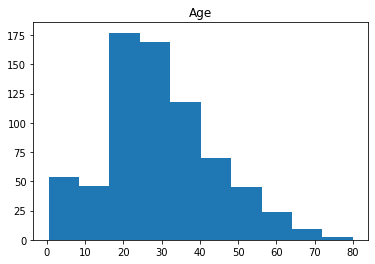

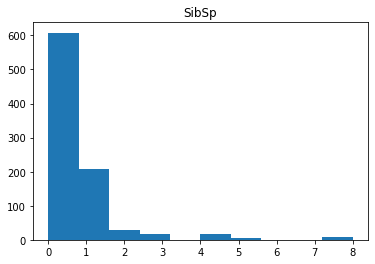

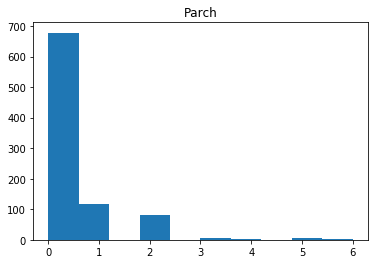

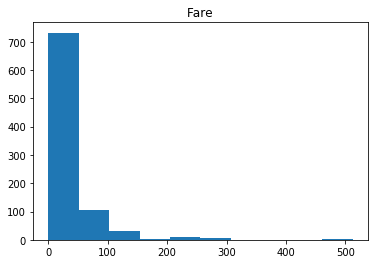

In [7]:
import matplotlib.pyplot as plt 

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [8]:
corr = df_num.corr()
corr

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


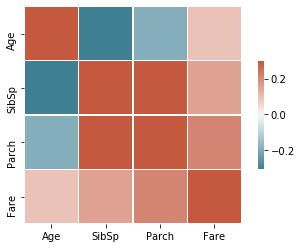

In [9]:
import seaborn as sns

cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df_train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


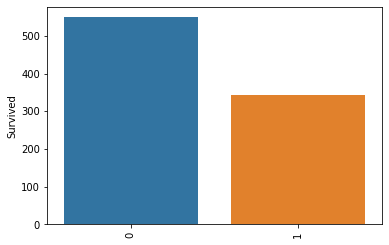

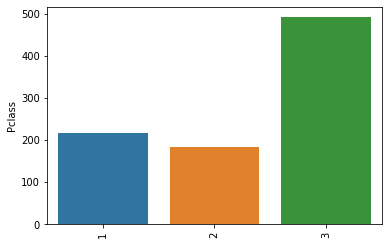

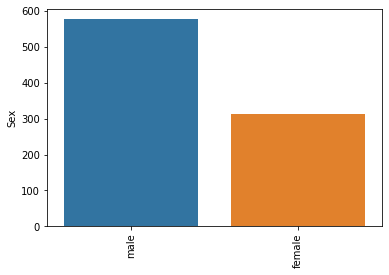

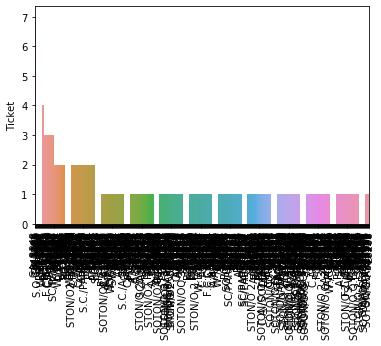

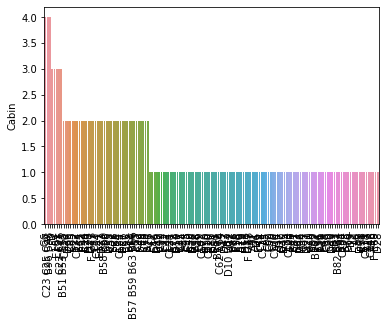

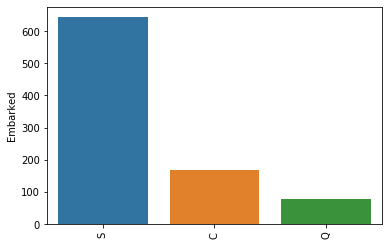

In [11]:
# categorical vars
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    # print('bar chart for %s: Total: %d' % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index , y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [12]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [13]:
# Feature Engineering >> simplify some columns

# graphs showed that ticket/ cabin columns(too many values >> does not cooperate well with our data)
df_cat.Cabin
df_train['multiple_cabin'] = df_cat.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df_train.multiple_cabin.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: multiple_cabin, dtype: int64

In [14]:
pd.pivot_table(df_train, index = 'Survived', columns = ['multiple_cabin'] , values = 'Ticket', aggfunc='count')

multiple_cabin,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
# Create categories based on the cabin's letter
df_train['cabin_adv'] = df_train.Cabin.apply(lambda x: str(x)[0])
df_train.cabin_adv.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [16]:
pd.pivot_table(df_train, index = 'Survived', columns = 'cabin_adv' , values = 'Ticket', aggfunc='count')
# it is clear that most of the people who had not a clear cabin name (n= NaN) did not survive, 
# and most of the people with a clear cabin name did make it 

# >>> we can use this as a categorical var (it is significant)

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [17]:
# understand ticket numbers
# # numeric vs non numeric
df_train['numeric_ticket'] = df_train.Ticket.apply(lambda x : 1 if x.isnumeric() else 0)
df_train.numeric_ticket.value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [18]:
df_train['ticket_letters'] = df_train.Ticket.apply(lambda x: 0 if x.isnumeric() else x.split(' ')[0])
df_train['ticket_letters'].value_counts()

0             661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
SC/PARIS        5
C               5
F.C.C.          5
S.O.C.          5
LINE            4
SC/Paris        4
PP              3
S.O./P.P.       3
A/4             3
A/4.            3
SC/AH           3
WE/P            2
P/PP            2
SOTON/O2        2
A.5.            2
A./5.           2
S.C./PARIS      2
W.E.P.          1
S.W./PP         1
W/C             1
SW/PP           1
S.C./A.4.       1
SO/C            1
A/S             1
F.C.            1
S.O.P.          1
C.A./SOTON      1
SCO/W           1
Fa              1
SC              1
S.P.            1
A4.             1
Name: ticket_letters, dtype: int64

In [19]:
pd.pivot_table(df_train, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [20]:
pd.pivot_table(df_train,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,A./5.,A.5.,A/4,A/4.,A/5,A/5.,A/S,A4.,C,...,SOTON/O.Q.,SOTON/O2,SOTON/OQ,STON/O,STON/O2.,SW/PP,W./C.,W.E.P.,W/C,WE/P
Survived,,,,,,,,,,,,,,,,,,,,,
0,407.0,2.0,2.0,3.0,3.0,9.0,6.0,1.0,1.0,3.0,...,7.0,2.0,6.0,7.0,3.0,NaN,8.0,1.0,1.0,1.0
1,254.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,...,1.0,NaN,1.0,5.0,3.0,1.0,1.0,NaN,NaN,1.0


In [21]:
# feature engineering on people's title : Bonnell, Miss. Elizabeth
df_train['name_title']= df_train.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
df_train.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Capt              1
Don               1
Ms                1
Jonkheer          1
Mme               1
Lady              1
Sir               1
Name: name_title, dtype: int64

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  train_test      891 non-null    int64  
 13  multiple_cabin  891 non-null    int64  
 14  cabin_adv       891 non-null    object 
 15  numeric_ticket  891 non-null    int64  
 16  ticket_letters  891 non-null    object 
 17  name_title      891 non-null    obj

In [23]:
# Data Preprocessing for Model:
    # do the same transformations to the test set 
    # replace null values from continuous variables by their mean (age (the others had no missing vals))
    # Drop null values from Embarked (only 2)
    # Normalize some vars : (SibSp, fare) :
    # Normalized fare using logarithm to give more semblance of a normal distribution
    # convert fare to     
    # Include only relevant variables
    # Do categorical transforms on all data
    # Impute data with mean for fare and age (Should also experiment with median)
    # Scaled data 0-1 with standard scaler
    # Re-split train/test     

In [24]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,n,0,a5,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,1,C,0,pc,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,n,0,sotonoq,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0,n,1,0,Mr


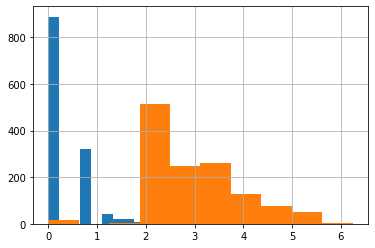

In [25]:
# replace null values from continuous variables by their mean (age (the others had no missing vals))
# all_data.Age = all_data.Age.fillna(df_train.Age.mean())
# median = df_train.Age.median()
# values = {'Age': median}
# df_all_test = all_data
# df_all_test.fillna(value=values)
# all_data.Age = all_data.Age.fillna(median())
all_data.Age = all_data.Age.fillna(df_train.Age.median())

# Drop null values from Embarked (only 2)
all_data.dropna(subset=['Embarked'], inplace=True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [30]:
# converted fare to category for pd.get_dummies()
all_data.Age.head(10)
# all_data.Pclass = all_data.Pclass.astype(str)


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [31]:
# all_data.to_csv('eda_data.csv')